In [4]:
import pandas as pd

# Load the dataset
file_path = '/content/kc_house_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Display the data types of each column
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [6]:
# Drop 'id' and 'Unnamed: 0' if they exist in the dataframe, then describe
columns_to_drop = [col for col in ['id', 'Unnamed: 0'] if col in df.columns]
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Display the statistical summary
df_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Count unique floor values and convert to a dataframe
floors_count = df['floors'].value_counts().to_frame()
floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


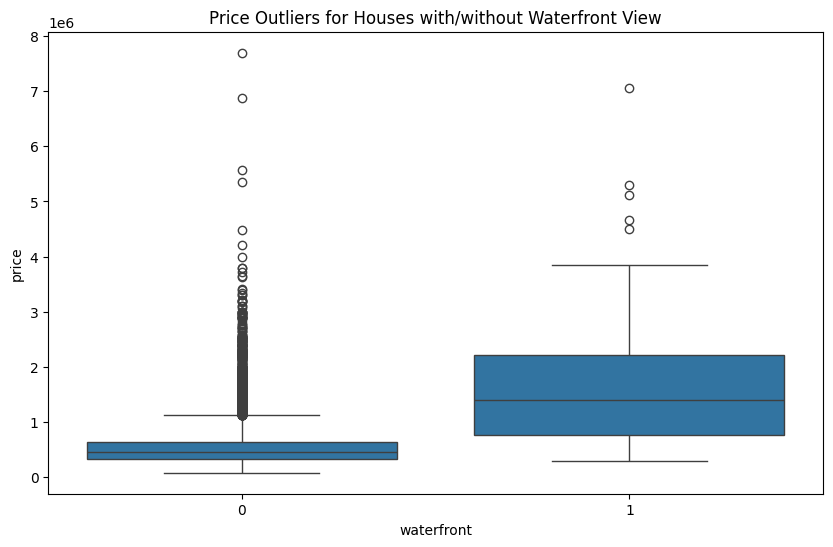

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check for price outliers based on waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Outliers for Houses with/without Waterfront View')
plt.show()

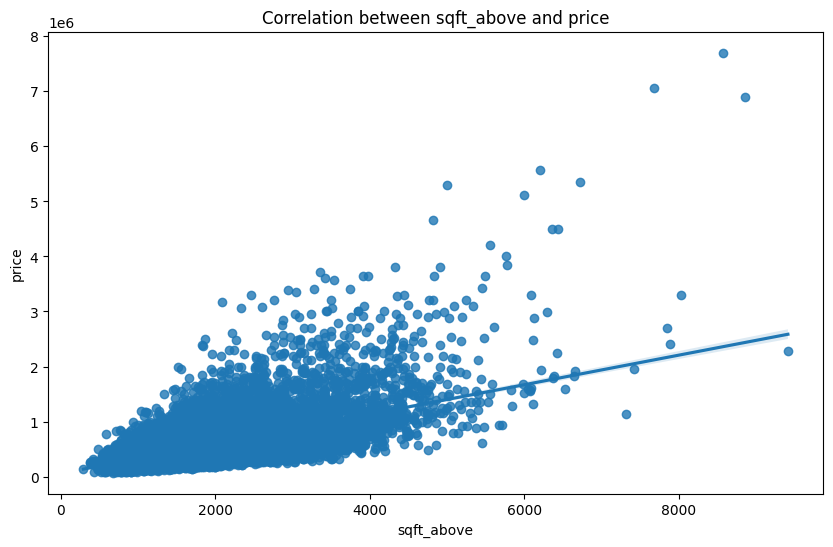

The correlation between 'sqft_above' and 'price' is positive with a value of 0.61.


In [9]:
import numpy as np

# Regplot to determine the correlation between sqft_above and price
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Correlation between sqft_above and price')
plt.show()

# Calculate the Pearson correlation coefficient
correlation = np.corrcoef(df['sqft_above'], df['price'])[0, 1]

# Display the correlation value and its interpretation
if correlation > 0:
    print(f"The correlation between 'sqft_above' and 'price' is positive with a value of {correlation:.2f}.")
elif correlation < 0:
    print(f"The correlation between 'sqft_above' and 'price' is negative with a value of {correlation:.2f}.")
else:
    print(f"There is no correlation between 'sqft_above' and 'price', with a value of {correlation:.2f}.")

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and test sets
X = df[['sqft_living']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.49406905389089006

In [11]:
# Fit a linear regression model using the given list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model and calculate R^2
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.6614781405487573

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# List of tuples for the pipeline
pipeline_steps = [('scale', StandardScaler()),
                  ('polynomial', PolynomialFeatures(include_bias=False)),
                  ('model', LinearRegression())]
pipeline_steps

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [18]:
from sklearn.pipeline import Pipeline

# Create a pipeline object
pipeline = Pipeline(pipeline_steps)

# Fit the pipeline and calculate R^2
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7090292739349497


In [15]:
from sklearn.linear_model import Ridge

# Fit a Ridge regression model with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Calculate R^2
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_ridge

0.6614734596866666

In [16]:
# Perform second-order polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge regression with regularization parameter 0.1
ridge_model_poly = Ridge(alpha=0.1)
ridge_model_poly.fit(X_train_poly, y_train)

# Calculate R^2 for the transformed data
y_pred_ridge_poly = ridge_model_poly.predict(X_test_poly)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
r2_ridge_poly

0.7003486869405879